In [2]:
#1:Highest and lowest total COVID19 cases
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetHighestLowestCovidCases')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

  Highest_State  Highest_Cases Lowest_State  Lowest_Cases
0   Maharashtra         468265      Mizoram           537


C:\Users\mpk25\AppData\Local\Temp\ipykernel_7660\2722818392.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


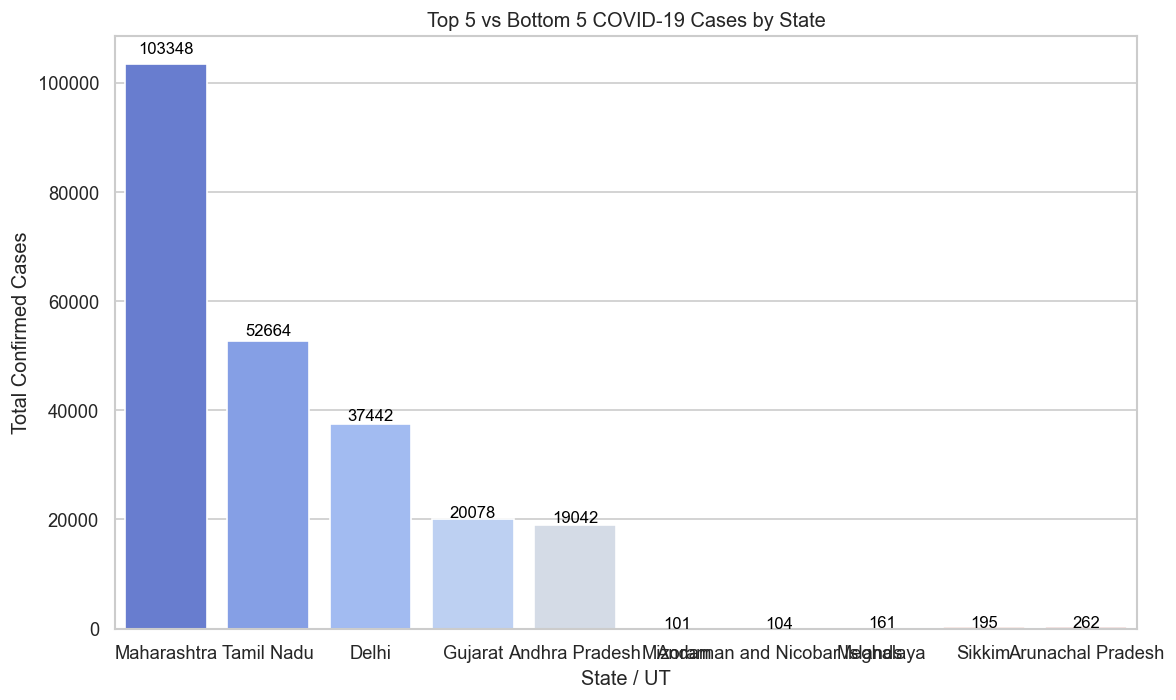

Top 5 States by Cases:
      State_UT  Avg_Cases
   Maharashtra  103348.62
    Tamil Nadu   52664.99
         Delhi   37442.36
       Gujarat   20078.75
Andhra Pradesh   19042.04

Bottom 5 States by Cases:
                   State_UT  Avg_Cases
                    Mizoram     101.79
Andaman and Nicobar Islands     104.38
                  Meghalaya     161.98
                     Sikkim     195.73
          Arunachal Pradesh     262.97


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Avg_Cases' is float type to avoid decimal + float errors
df['Avg_Cases'] = df['Avg_Cases'].astype(float)

# Sort for top 5 and bottom 5
top5 = df.sort_values('Avg_Cases', ascending=False).head(5)
bottom5 = df.sort_values('Avg_Cases', ascending=True).head(5)
plot_df = pd.concat([top5, bottom5])

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='State_UT', y='Avg_Cases', data=plot_df, palette='coolwarm')

plt.title('Top 5 vs Bottom 5 COVID-19 Cases by State')
plt.xlabel('State / UT')
plt.ylabel('Total Confirmed Cases')

# Annotate case values on bars
for i, v in enumerate(plot_df['Avg_Cases']):
    plt.text(i, v + (v * 0.02 if v > 0 else 50), str(int(v)), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Print details for top 5 and bottom 5 states
print("Top 5 States by Cases:")
print(top5[['State_UT', 'Avg_Cases']].to_string(index=False))
print("\nBottom 5 States by Cases:")
print(bottom5[['State_UT', 'Avg_Cases']].to_string(index=False))



In [10]:
# 2:State with the most COVID‑19 deaths
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetStateWithMostCovidDeaths')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

      State_UT  Total_Deaths
0  Maharashtra         16476


C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\1612838616.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


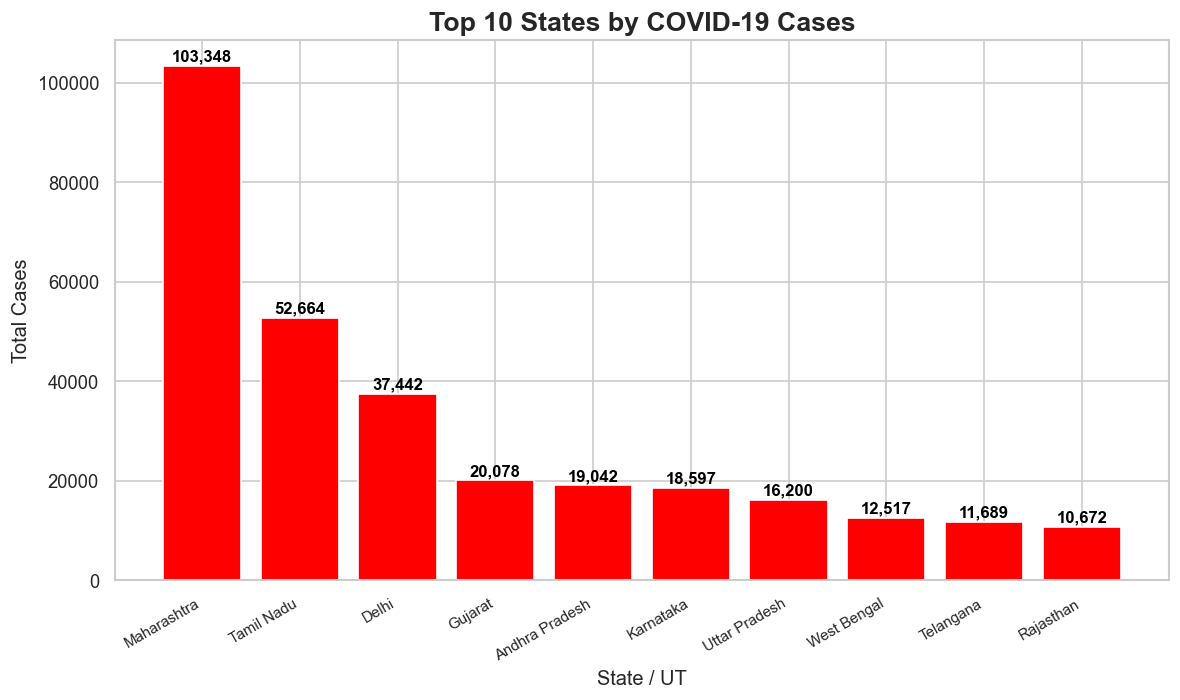

Top 10 States by Cases:
      State_UT  Avg_Cases
   Maharashtra  103348.62
    Tamil Nadu   52664.99
         Delhi   37442.36
       Gujarat   20078.75
Andhra Pradesh   19042.04
     Karnataka   18597.97
 Uttar Pradesh   16200.37
   West Bengal   12517.42
     Telangana   11689.77
     Rajasthan   10672.68


In [87]:
import matplotlib.pyplot as plt

# Ensure cases column is float for plotting
df['Avg_Cases'] = df['Avg_Cases'].astype(float)

# Sort and select top 10 states
top10 = df.sort_values('Avg_Cases', ascending=False).head(10)

# Prepare data for the chart
states = top10['State_UT'].tolist()
cases = top10['Avg_Cases'].tolist()

plt.figure(figsize=(10, 6))
bars = plt.bar(states, cases, color='red')

# Add value on each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(cases),
             f'{int(bar.get_height()):,}', ha='center', fontsize=10, weight='bold', color='black')

plt.title('Top 10 States by COVID-19 Cases', fontsize=16, weight='bold')
plt.xlabel('State / UT')
plt.ylabel('Total Cases')
plt.xticks(rotation=30, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

# Print the top states with case numbers
print("Top 10 States by Cases:")
print(top10[['State_UT', 'Avg_Cases']].to_string(index=False))


In [15]:
# 3:Average recovery rate for each state
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetAverageRecoveryRate')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT Avg_Recovery_Rate
0                Andaman and Nicobar Islands             65.91
1                             Andhra Pradesh             35.40
2                          Arunachal Pradesh             44.07
3                                      Assam             46.11
4                                      Bihar             43.04
5                                 Chandigarh             49.77
6                               Chhattisgarh             55.33
7   Dadra and Nagar Haveli and Daman and Diu             28.08
8                                      Delhi             39.19
9                                        Goa             51.36
10                                   Gujarat             43.11
11                                   Haryana             48.12
12                          Himachal Pradesh             48.89
13                         Jammu and Kashmir             35.13
14                                 Jharkhand           

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\952846400.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


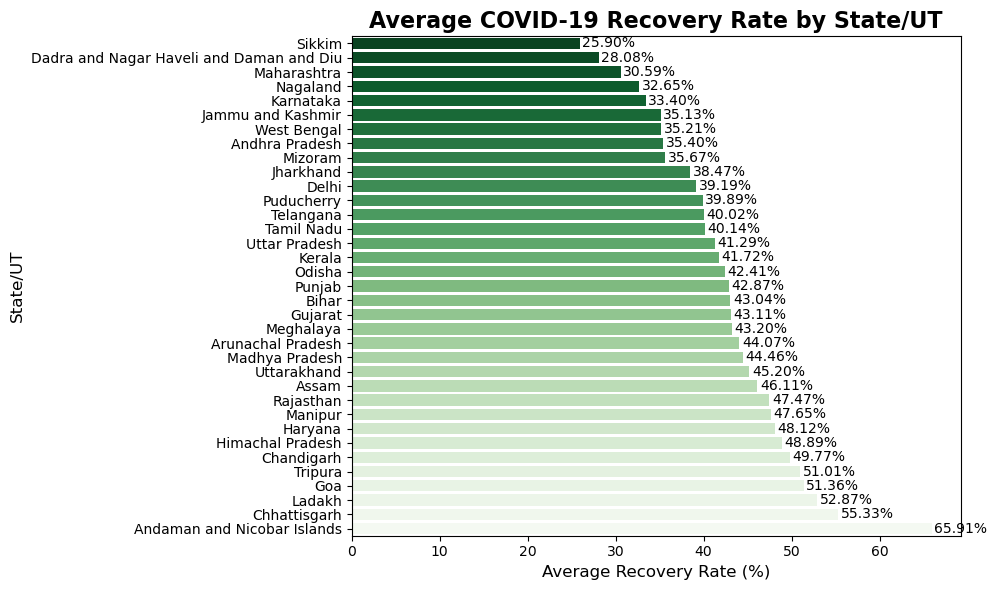

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert decimal to float
df['Avg_Recovery_Rate'] = df['Avg_Recovery_Rate'].astype(float)

# Sort by recovery rate
df = df.sort_values(by='Avg_Recovery_Rate', ascending=True)

# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Avg_Recovery_Rate', y='State_UT', palette='Greens_r')

# Titles and labels
plt.title('Average COVID-19 Recovery Rate by State/UT', fontsize=16, weight='bold')
plt.xlabel('Average Recovery Rate (%)', fontsize=12)
plt.ylabel('State/UT', fontsize=12)

# Annotate values on bars
for index, value in enumerate(df['Avg_Recovery_Rate']):
    plt.text(float(value) + 0.3, index, f'{value:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [21]:
# 4:First and last states to see peak daily cases
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetPeakCovidCasesStates')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

              Category                     State_UT   Peak_Date  Peak_Cases
0  First to Reach Peak                       Ladakh  2020-06-14         198
1   Last to Reach Peak  Andaman and Nicobar Islands  2020-08-06          99


C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\879077403.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


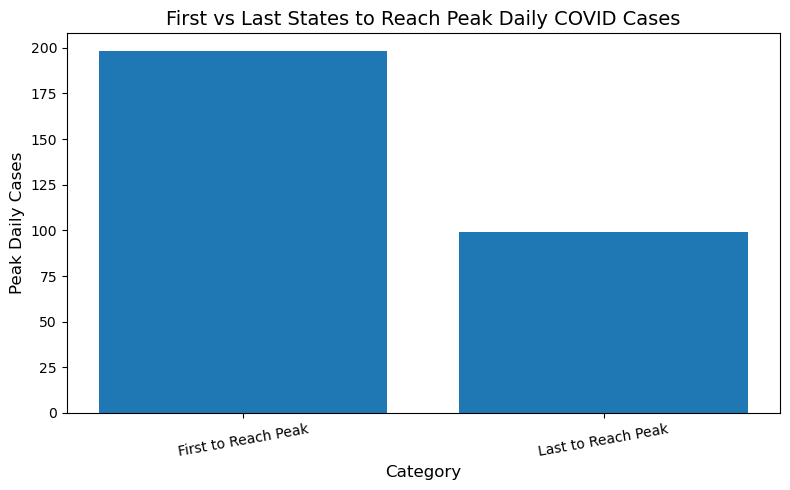


 Final Result:
 First to reach peak: Ladakh on 2020-06-14 with 198 cases
 Last to reach peak:  Andaman and Nicobar Islands on 2020-08-06 with 99 cases


In [28]:


# -------------------------  
# Visualization
# -------------------------
plt.figure(figsize=(8, 5))
plt.bar(df["Category"], df["Peak_Cases"])
plt.xlabel("Category", fontsize=12)
plt.ylabel("Peak Daily Cases", fontsize=12)
plt.title("First vs Last States to Reach Peak Daily COVID Cases", fontsize=14)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# -------------------------  
#  Print Result in clean format  
# -------------------------

first_state = df.iloc[0]["State_UT"]
first_date = df.iloc[0]["Peak_Date"]
first_cases = df.iloc[0]["Peak_Cases"]

last_state = df.iloc[1]["State_UT"]
last_date = df.iloc[1]["Peak_Date"]
last_cases = df.iloc[1]["Peak_Cases"]

print("\n Final Result:")
print(f" First to reach peak: {first_state} on {first_date} with {first_cases} cases")
print(f" Last to reach peak:  {last_state} on {last_date} with {last_cases} cases")


In [114]:
#5:National daily trend of new cases and deaths
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetNationalDailyTrend1')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

           Date Total_NewCases Total_Deaths
0    2020-01-30              0            0
1    2020-01-31              0            0
2    2020-02-01              1            0
3    2020-02-02              1            0
4    2020-02-03              0            0
..          ...            ...          ...
181  2020-08-02          54735        37364
182  2020-08-03          52972        38135
183  2020-08-04          52050        38938
184  2020-08-05          52509        39795
185  2020-08-06          56282        40699

[186 rows x 3 columns]


C:\Users\mpk25\AppData\Local\Temp\ipykernel_6688\184365490.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


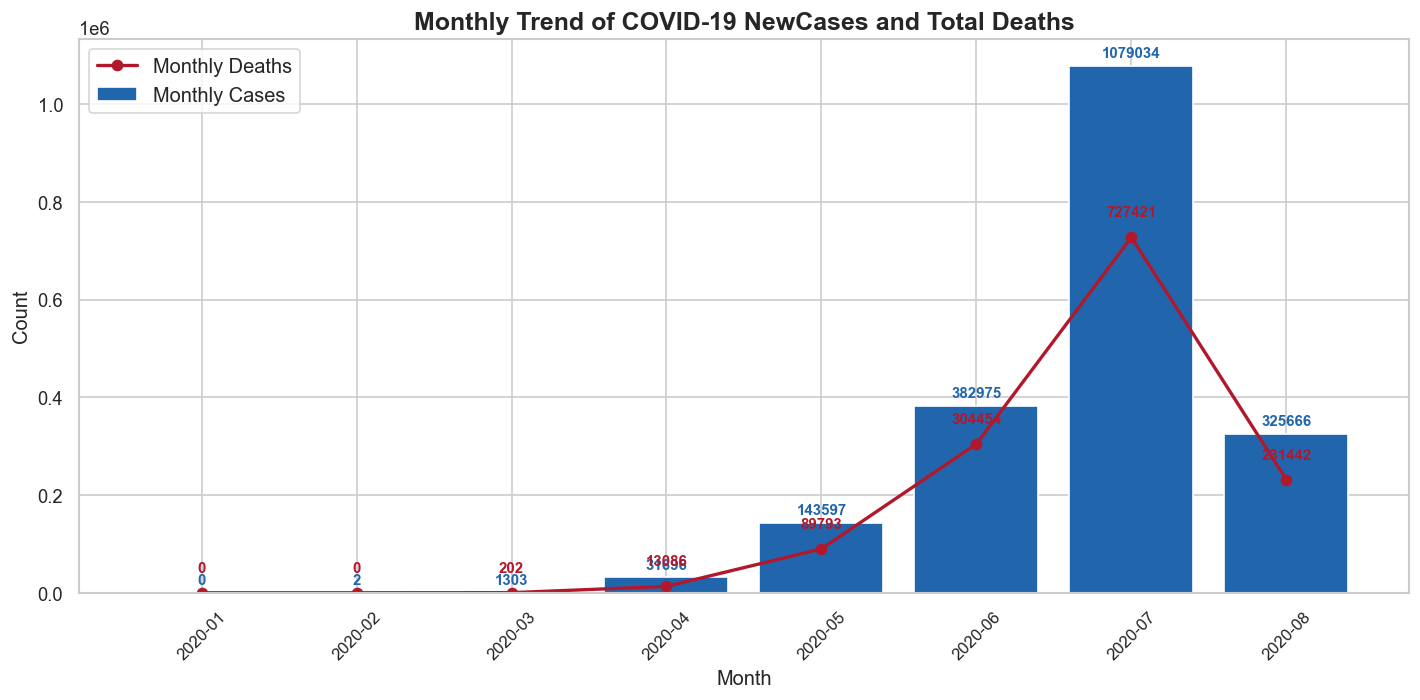

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract month in YYYY-MM format
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Aggregate monthly totals
monthly = df.groupby('Month').agg({'Total_NewCases':'sum', 'Total_Deaths':'sum'}).reset_index()

plt.figure(figsize=(12,6))

# Bar chart for monthly cases
plt.bar(monthly['Month'], monthly['Total_NewCases'], color="#2166ac", label='Monthly Cases')

# Line chart for monthly deaths
plt.plot(monthly['Month'], monthly['Total_Deaths'], color="#b2182b", marker='o', linewidth=2, label='Monthly Deaths')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Monthly Trend of COVID-19 NewCases and Total Deaths', fontsize=15, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Add labels on bars (cases) and line points (deaths)
for idx, v in enumerate(monthly['Total_NewCases']):
    plt.text(idx, v + max(monthly['Total_NewCases']) * 0.01, str(v), ha='center', va='bottom', fontsize=9, color='#2166ac', fontweight='bold')
for idx, v in enumerate(monthly['Total_Deaths']):
    plt.text(idx, v + max(monthly['Total_Deaths']) * 0.05, str(v), ha='center', va='bottom', fontsize=9, color='#b2182b', fontweight='bold')

plt.show()


In [28]:
# 6:Correlation between vaccination and cases
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetVaccinationCasesCorrelation')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT  Total_Vaccination_Doses  \
0                                Maharashtra                177977996   
1                                 Tamil Nadu                127533904   
2                             Andhra Pradesh                110957430   
3                                  Karnataka                122152396   
4                                      Delhi                 37409355   
5                              Uttar Pradesh                392011174   
6                                West Bengal                156100370   
7                                  Telangana                 77627542   
8                                    Gujarat                128105565   
9                                      Bihar                157293015   
10                                     Assam                 50335778   
11                                 Rajasthan                115721511   
12                                    Odisha       

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\1568379542.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


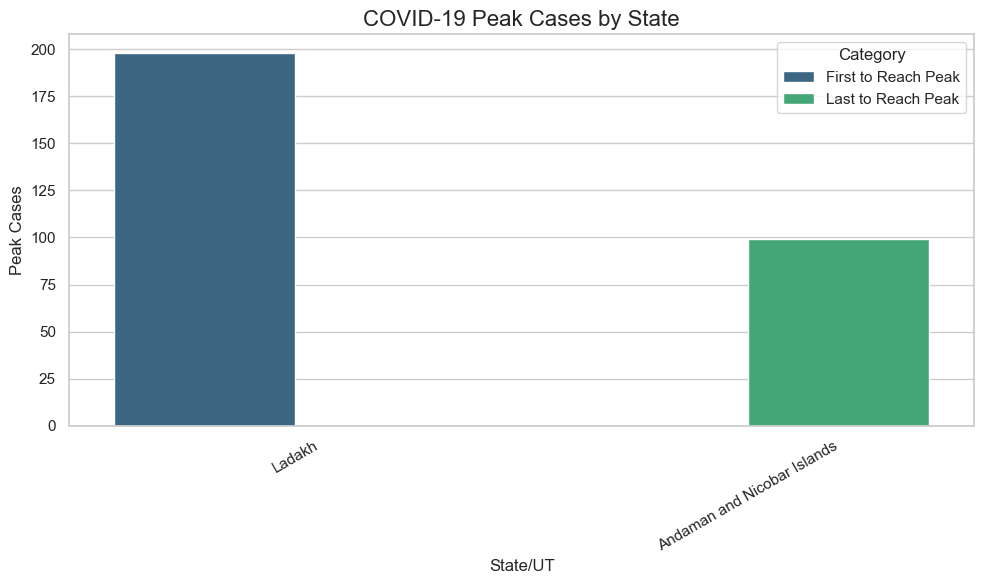


Summary of COVID-19 Peak Information:

• State/UT: Ladakh | Category: First to Reach Peak | Peak Date: 2020-06-14 00:00:00 | Peak Cases: 198
• State/UT: Andaman and Nicobar Islands | Category: Last to Reach Peak | Peak Date: 2020-08-06 00:00:00 | Peak Cases: 99


In [66]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='State_UT',
    y='Peak_Cases',
    hue='Category',
    palette='viridis'
)

plt.title("COVID-19 Peak Cases by State", fontsize=16)
plt.xlabel("State/UT")
plt.ylabel("Peak Cases")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print("\nSummary of COVID-19 Peak Information:\n")
for i, row in df.iterrows():
    print(f"• State/UT: {row['State_UT']} | Category: {row['Category']} | Peak Date: {row['Peak_Date']} | Peak Cases: {row['Peak_Cases']}")



In [30]:
# 7:States with higher vaccination showing fewer deaths
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetVaccinationDeathRelation')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT  Total_Vaccination_Doses  \
0                              Uttar Pradesh                392011174   
1                                Maharashtra                177977996   
2                                      Bihar                157293015   
3                                West Bengal                156100370   
4                             Madhya Pradesh                133940196   
5                                    Gujarat                128105565   
6                                 Tamil Nadu                127533904   
7                                  Karnataka                122152396   
8                                  Rajasthan                115721511   
9                             Andhra Pradesh                110957430   
10                                    Odisha                 81545960   
11                                 Telangana                 77627542   
12                                    Kerala       

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\4225332276.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


In [34]:
# 8:Vaccination per person vs recovery rate
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetVaccinationRecoveryRate')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT Vaccination_Per_Capita  \
0                                      Delhi                   1.94   
1                                    Haryana                   1.58   
2                                 Tamil Nadu                   1.52   
3                               Chhattisgarh                   1.53   
4                                    Gujarat                   1.82   
5                                     Ladakh                   1.95   
6                             Madhya Pradesh                   1.58   
7                                  Rajasthan                   1.46   
8                                  Telangana                   2.03   
9                                        Goa                   1.89   
10                                     Assam                   1.40   
11                               West Bengal                   1.55   
12  Dadra and Nagar Haveli and Daman and Diu                   2.04   
13    

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\1092157612.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


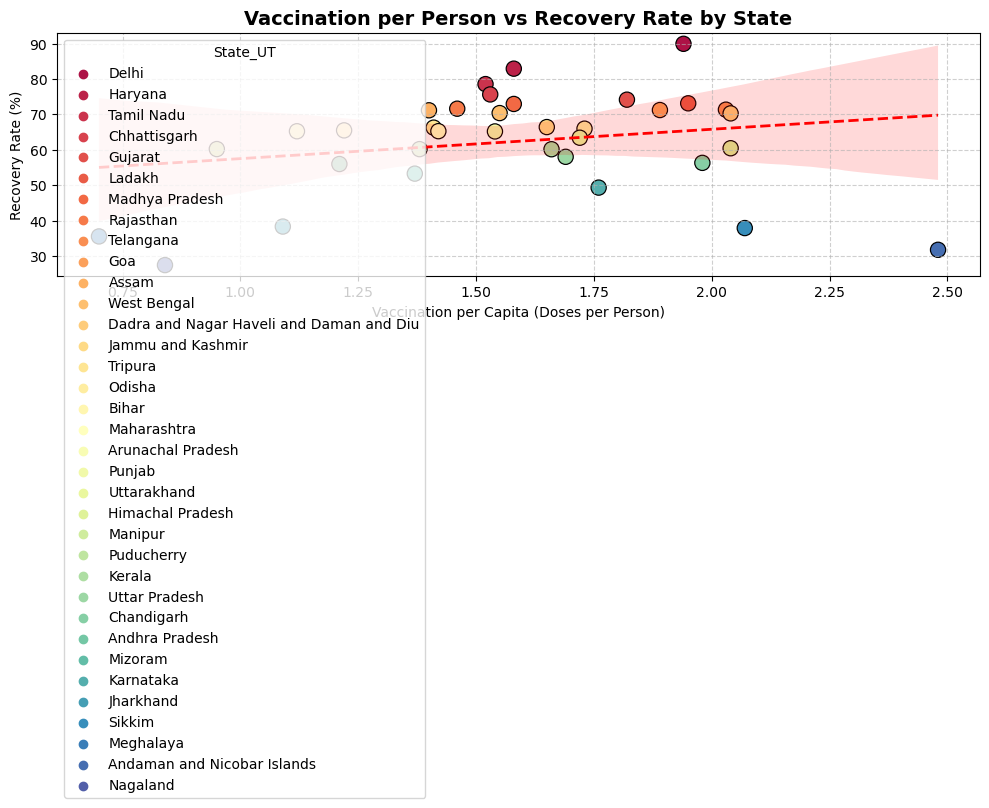

Correlation between vaccination per capita and recovery rate: 0.22


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns to numeric (in case they are strings or decimals)
df['Vaccination_Per_Capita'] = pd.to_numeric(df['Vaccination_Per_Capita'])
df['Recovery_Rate'] = pd.to_numeric(df['Recovery_Rate'])

plt.figure(figsize=(10, 6))

# Scatter Plot
sns.scatterplot(
    data=df,
    x='Vaccination_Per_Capita',
    y='Recovery_Rate',
    hue='State_UT',
    palette='Spectral',
    s=120,
    edgecolor='black'
)

# Add regression line
sns.regplot(
    data=df,
    x='Vaccination_Per_Capita',
    y='Recovery_Rate',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'linewidth': 2}
)

plt.title('Vaccination per Person vs Recovery Rate by State', fontsize=14, weight='bold')
plt.xlabel('Vaccination per Capita (Doses per Person)')
plt.ylabel('Recovery Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

corr = df['Vaccination_Per_Capita'].corr(df['Recovery_Rate'])
print(f"Correlation between vaccination per capita and recovery rate: {corr:.2f}")



In [37]:
# 9:Low vaccination, high COVID19 cases
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetLowVaccinationHighCases')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

            State_UT  Total_Vaccination_Doses  Total_Cases
0              Delhi                 37409355       140232
1              Assam                 50335778        50445
2            Haryana                 45546800        38548
3             Kerala                 57511593        29151
4  Jammu and Kashmir                 24782265        22955
5             Punjab                 47051166        19856
6          Jharkhand                 43875944        14888


C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\3682515377.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


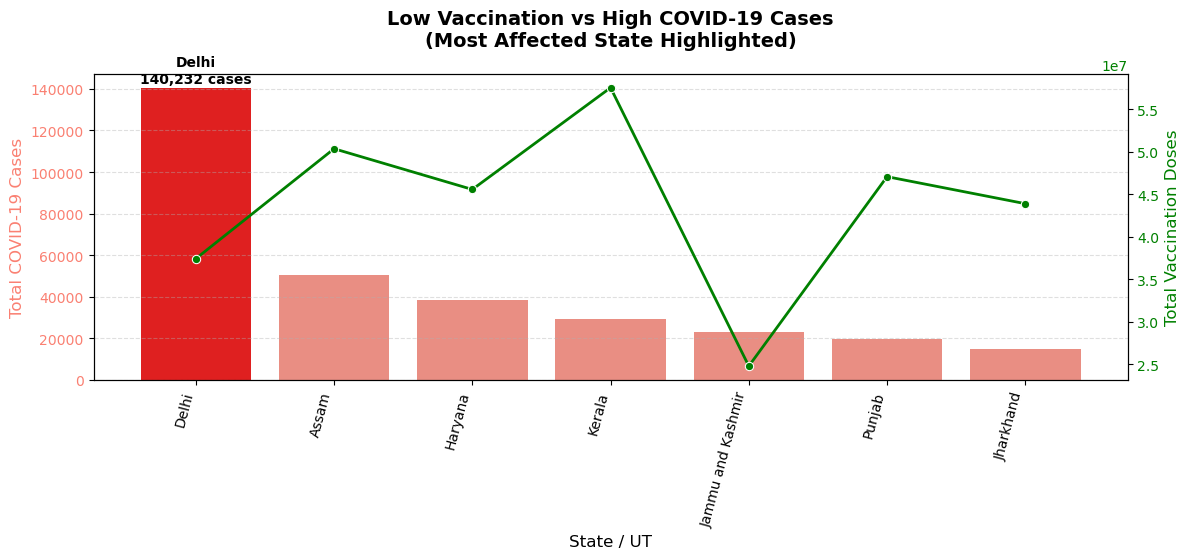

Most affected state: Delhi (140,232 total cases)


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
state_col = 'State_UT'
vax_col = 'Total_Vaccination_Doses'
cases_col = 'Total_Cases'

# Sort by cases
df = df.sort_values(by=cases_col, ascending=False).reset_index(drop=True)

# Identify most affected state
most_affected_state = df.loc[df[cases_col].idxmax(), state_col]
max_cases = df[cases_col].max()

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot - COVID cases
bar_colors = ['red' if s == most_affected_state else 'salmon' for s in df[state_col]]
sns.barplot(x=state_col, y=cases_col, data=df, palette=bar_colors, ax=ax1)
ax1.set_ylabel('Total COVID-19 Cases', color='salmon', fontsize=12)
ax1.set_xlabel('State / UT', fontsize=12)
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.set_xticklabels(df[state_col], rotation=75, ha='right')

# Add annotation for the most affected state
max_idx = df[cases_col].idxmax()
ax1.text(max_idx, max_cases + (max_cases * 0.02),
         f"{most_affected_state}\n{max_cases:,} cases",
         color='black', ha='center', fontsize=10, fontweight='bold')

# Line plot - Vaccinations
ax2 = ax1.twinx()
sns.lineplot(x=state_col, y=vax_col, data=df, color='green', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Total Vaccination Doses', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Title & formatting
plt.title('Low Vaccination vs High COVID-19 Cases\n(Most Affected State Highlighted)', 
          fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(f"Most affected state: {most_affected_state} ({max_cases:,} total cases)")



In [43]:
# 10:High vaccination coverage and high recovery rate
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetHighVaccinationHighRecovery')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

         State_UT  Total_Vaccination_Doses Recovery_Rate
0      Tamil Nadu                127533904         78.55
1         Gujarat                128105565         74.15
2  Madhya Pradesh                133940196         72.94
3       Rajasthan                115721511         71.60
4       Telangana                 77627542         71.33
5     West Bengal                156100370         70.36


C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\3949519944.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


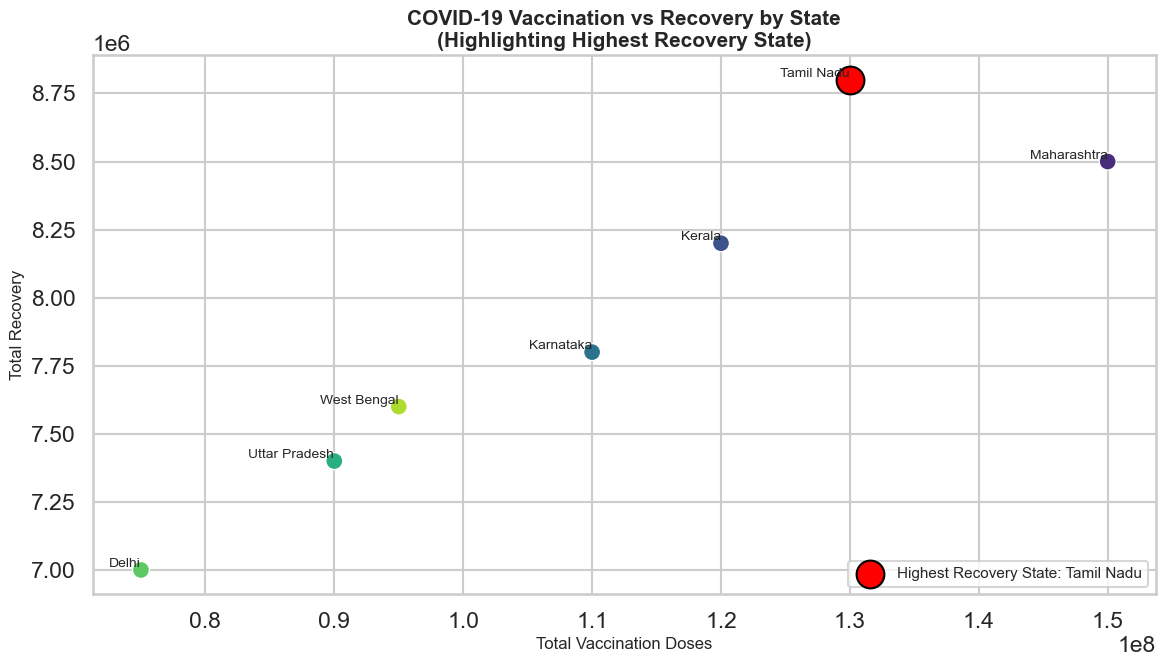

Highest recovery state: Tamil Nadu (78.55%)


In [49]:
# --- Visualization Section ---
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# Identify the state with the highest recovery
most_recovered = df.loc[df['Total_Recovery'].idxmax()]

# Create figure
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=df,
    x='Total_Vaccination_Doses',
    y='Total_Recovery',
    hue='State_UT',
    s=150,
    palette='viridis',
    legend=False
)

# Annotate all states
for i, row in df.iterrows():
    plt.text(row['Total_Vaccination_Doses'], row['Total_Recovery'],
             row['State_UT'], fontsize=10, ha='right', va='bottom')

# Highlight the state with highest recovery
plt.scatter(
    most_recovered['Total_Vaccination_Doses'],
    most_recovered['Total_Recovery'],
    s=400, c='red', edgecolor='black',
    label=f"Highest Recovery State: {most_recovered['State_UT']}"
)

# Labels and title
plt.xlabel("Total Vaccination Doses", fontsize=12)
plt.ylabel("Total Recovery", fontsize=12)
plt.title("COVID-19 Vaccination vs Recovery by State\n(Highlighting Highest Recovery State)",
          fontsize=15, weight='bold')

# Add legend
plt.legend(loc='lower right', fontsize=11, frameon=True)

# Improve layout
plt.tight_layout()
plt.show()

print(f"Highest recovery state: {max_recovery_state} ({max_recovery_value:.2f}%)")


In [50]:
# 11:Compare COVID‑19 and Vaccination Coverage Across Regions
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('CompareRegionalPerformance')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

    region Total_Vaccinations Total_Population Vaccination_Percent  \
0    North        88137060815      52106779302              169.15   
1    South        76031306056      48516531436              156.71   
2  Central        24817934103      15886688209              156.22   
3     West        61689099274      40286440442              153.13   
4     East        66264613820      48100304949              137.76   

  Total_Cases Total_Deaths Recovery_Rate  
0    11027870       271625         68.16  
1    15816556       218169         58.59  
2     1548074        48748         67.01  
3    19722212       758722         56.90  
4     5345585        69134         63.04  


C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\1607752272.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


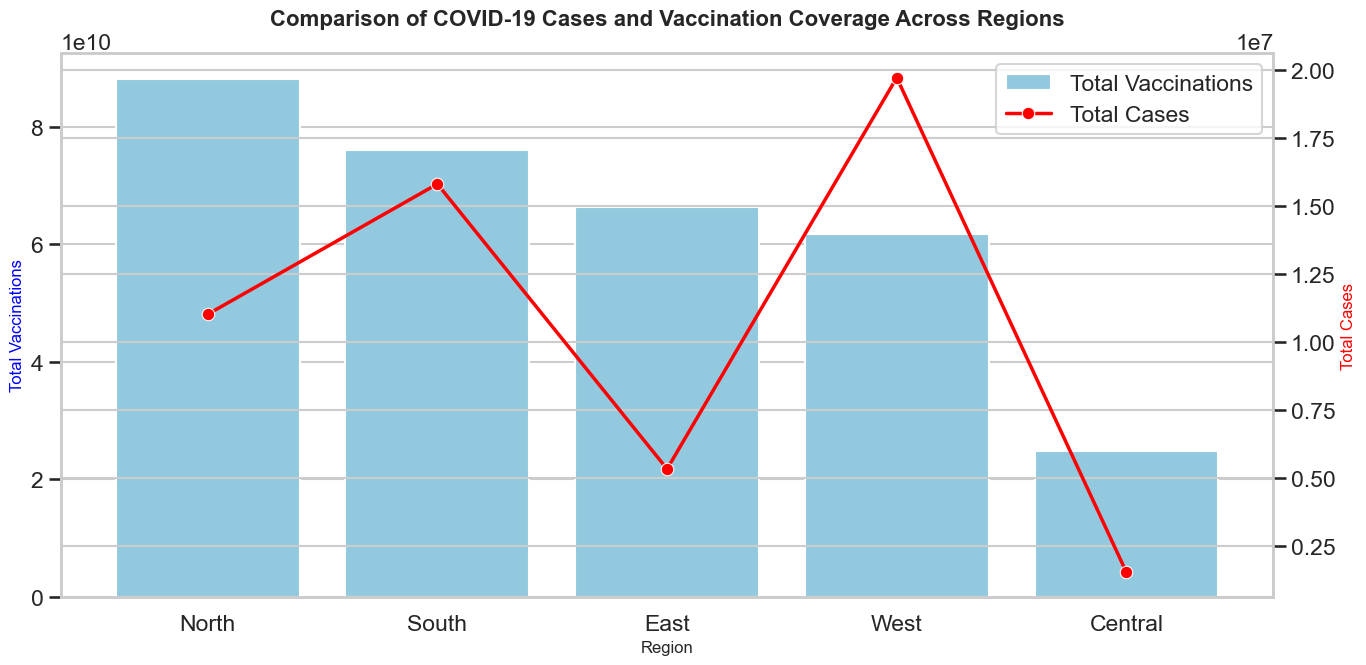

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", context="talk")

# Sort by Total_Vaccinations for better visualization
df_sorted = df.sort_values("Total_Vaccinations", ascending=False)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Total Vaccinations (bar chart)
sns.barplot(
    data=df_sorted,
    x="region",
    y="Total_Vaccinations",
    color="skyblue",
    ax=ax1,
    label="Total Vaccinations"
)

# Create secondary axis for Total Cases
ax2 = ax1.twinx()
sns.lineplot(
    data=df_sorted,
    x="region",
    y="Total_Cases",
    color="red",
    marker="o",
    linewidth=2.5,
    ax=ax2,
    label="Total Cases"
)

# Titles and labels
ax1.set_title("Comparison of COVID-19 Cases and Vaccination Coverage Across Regions",
              fontsize=16, weight="bold", pad=20)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Total Vaccinations", fontsize=12, color="blue")
ax2.set_ylabel("Total Cases", fontsize=12, color="red")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()


In [52]:
print(df.columns.tolist())

['region', 'Total_Vaccinations', 'Total_Population', 'Vaccination_Percent', 'Total_Cases', 'Total_Deaths', 'Recovery_Rate']


In [55]:
# 12:Identify Best‑Performing States (High Vaccination & Low Death Rate)
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('GetBestPerformingStates')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT Vaccination_Per_100 Death_Rate  \
0                                     Ladakh              195.23       0.44   
1                                  Telangana              203.44       0.81   
2                                        Goa              188.86       0.86   
3   Dadra and Nagar Haveli and Daman and Diu              204.14       0.15   
4                                     Odisha              173.14       0.58   
5                                Uttarakhand              172.17       1.19   
6                           Himachal Pradesh              204.26       0.48   
7                                     Kerala              165.74       0.32   
8                                 Chandigarh              197.92       1.57   
9                                     Sikkim              206.75       0.13   
10               Andaman and Nicobar Islands              248.44       1.36   

   Recovery_Rate  
0          73.12  
1          71

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\1766777917.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


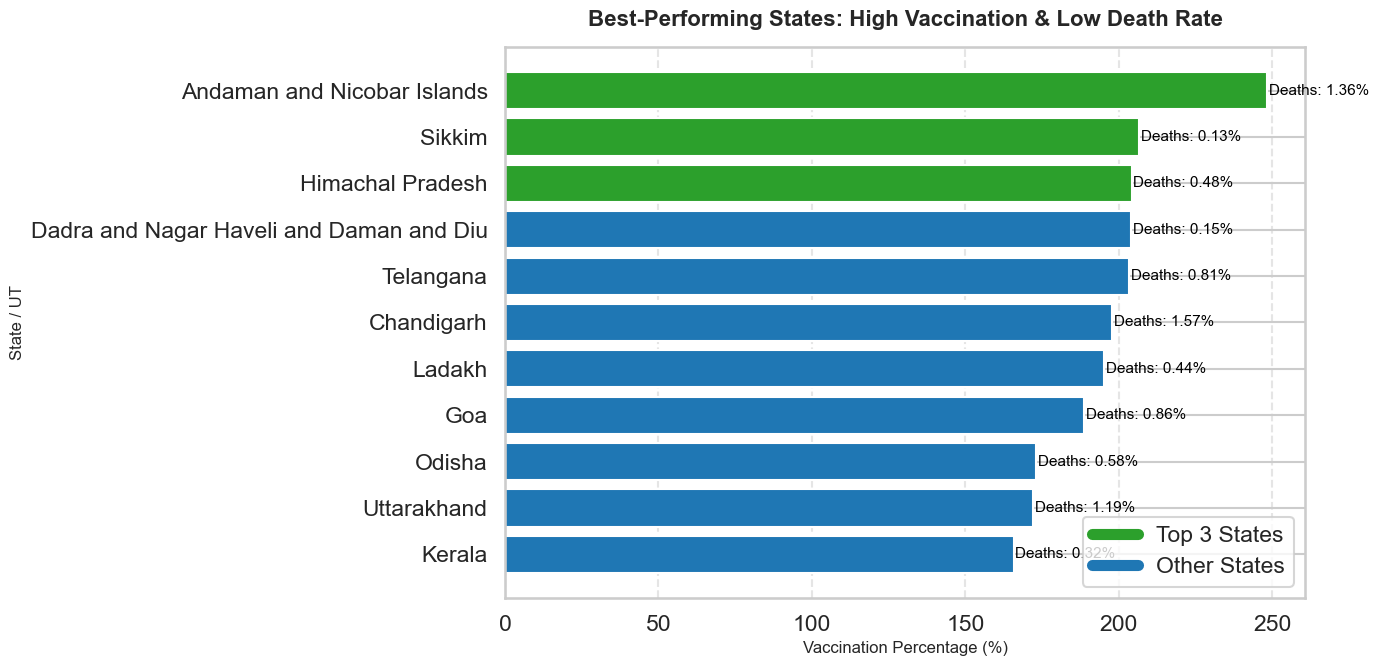

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columns based on your DataFrame
vacc_col = "Vaccination_Per_100"
death_col = "Death_Rate"

# Sort the dataframe — best states first (high vaccination, low death rate)
df_sorted = df.sort_values(by=[vacc_col, death_col], ascending=[False, True]).reset_index(drop=True)

# Mark top 3 states
top3_states = df_sorted["State_UT"].head(3).tolist()

# Assign colors: highlight top 3
df_sorted["Color"] = df_sorted["State_UT"].apply(
    lambda x: "#2ca02c" if x in top3_states else "#1f77b4"
)

# Set style
sns.set(style="whitegrid", context="talk")

# Create figure
plt.figure(figsize=(14, 7))

# Bar plot with custom colors
bars = plt.barh(df_sorted["State_UT"], df_sorted[vacc_col], color=df_sorted["Color"])

# Add death rate text next to each bar (convert decimal to float)
for index, value in enumerate(df_sorted[vacc_col]):
    plt.text(float(value) + 0.5, index, 
             f"Deaths: {df_sorted[death_col].iloc[index]:.2f}%",
             va='center', fontsize=11, color="black")

# Highlight legend
plt.legend(handles=[
    plt.Line2D([0], [0], color='#2ca02c', lw=8, label='Top 3 States'),
    plt.Line2D([0], [0], color='#1f77b4', lw=8, label='Other States')
], loc='lower right')

# Title and labels
plt.title("Best-Performing States: High Vaccination & Low Death Rate", 
          fontsize=16, weight='bold', pad=15)
plt.xlabel("Vaccination Percentage (%)", fontsize=12)
plt.ylabel("State / UT", fontsize=12)

# Reverse y-axis so best states appear at top
plt.gca().invert_yaxis()

# Add gridlines and adjust layout
plt.grid(True, linestyle='--', alpha=0.5, axis='x')
plt.tight_layout()

# Show plot
plt.show()


In [61]:
# 13:Rank States by Vaccination per 100 and Deaths per 100 Cases
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('RankStatesByVaccinationAndDeaths')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT Vaccination_Per_100  \
0                Andaman and Nicobar Islands              248.44   
1                                     Sikkim              206.75   
2                           Himachal Pradesh              204.26   
3   Dadra and Nagar Haveli and Daman and Diu              204.14   
4                                  Telangana              203.44   
5                                 Chandigarh              197.92   
6                                     Ladakh              195.23   
7                                      Delhi              193.82   
8                                        Goa              188.86   
9                                    Gujarat              181.97   
10                                 Karnataka              175.51   
11                                    Odisha              173.14   
12                               Uttarakhand              172.17   
13                             Uttar Pradesh    

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\3337205851.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


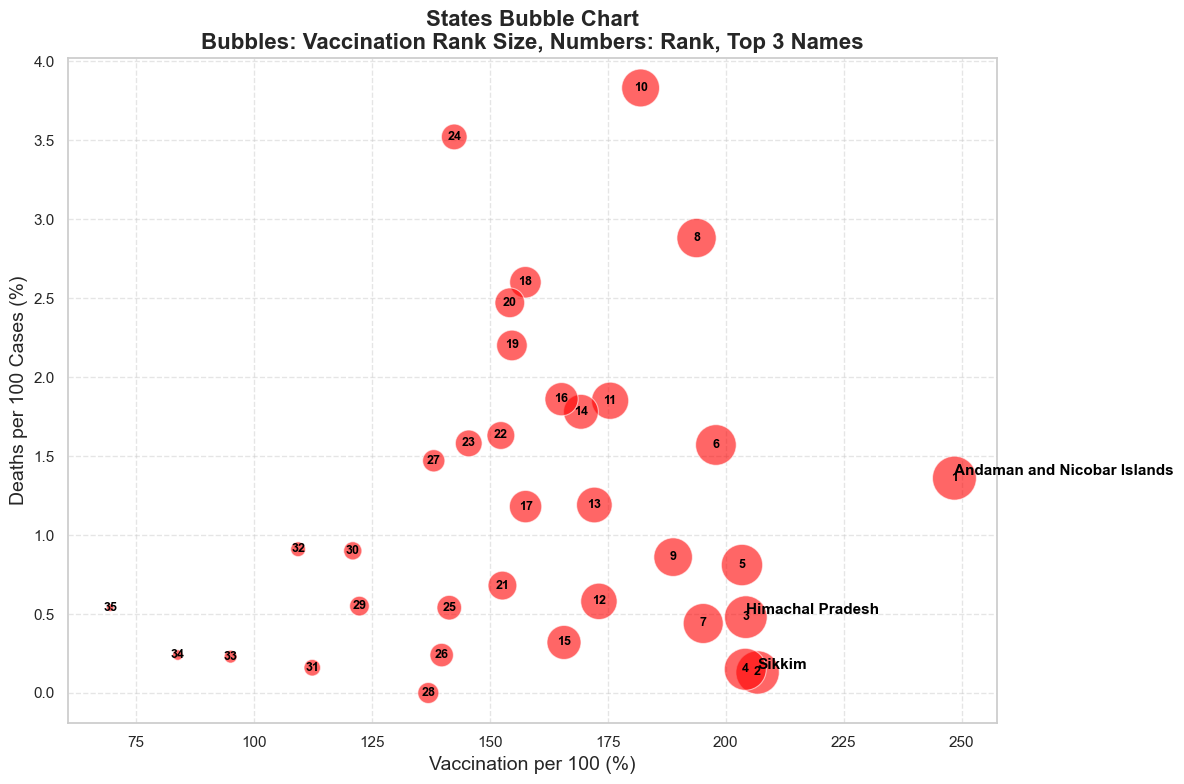

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your column names
vacc_col = "Vaccination_Per_100"
death_col = "Deaths_Per_100_Cases"
vacc_rank_col = "Vaccination_Rank"

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Normalize ranks for bubble sizes
max_rank = df[vacc_rank_col].max()
bubble_sizes = (max_rank - df[vacc_rank_col] + 1) / max_rank * 1000

# Plot bubbles with red color
plt.scatter(
    df[vacc_col].astype(float),
    df[death_col].astype(float),
    s=bubble_sizes,
    c='red',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.8
)

# Add rank numbers in black at center of each bubble
for _, row in df.iterrows():
    plt.text(
        row[vacc_col], 
        row[death_col], 
        str(int(row[vacc_rank_col])),  # rank as string
        fontsize=9,
        ha='center',
        va='center',
        weight='bold',
        color='black'
    )

# Highlight top 3 states
top3_df = df.sort_values(by=[vacc_col, death_col], ascending=[False, True]).head(3)

# Annotate top 3 state names in black near their bubbles
for _, row in top3_df.iterrows():
    plt.text(
        row[vacc_col], row[death_col], row['State_UT'],
        fontsize=11,
        ha='left',
        va='bottom',
        weight='bold',
        color='black'
    )

plt.title('States Bubble Chart\nBubbles: Vaccination Rank Size, Numbers: Rank, Top 3 Names', fontsize=16, weight='bold')
plt.xlabel('Vaccination per 100 (%)', fontsize=14)
plt.ylabel('Deaths per 100 Cases (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [69]:
# 14: Check if Highly Populated States Have Lower Vaccination per Person
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('AnalyzePopulationVaccinationRelation')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT  Population Vaccination_Per_100  \
0                              Uttar Pradesh   231502578              169.33   
1                                      Bihar   128500364              122.41   
2                                Maharashtra   124904071              142.49   
3                                West Bengal   100896618              154.71   
4                             Andhra Pradesh    91702478              121.00   
5                             Madhya Pradesh    85002417              157.57   
6                                 Tamil Nadu    83697770              152.37   
7                                  Rajasthan    79502477              145.56   
8                                    Gujarat    70400153              181.97   
9                                  Karnataka    69599762              175.51   
10                                    Odisha    47099270              173.14   
11                                 Jhark

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\2263399757.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


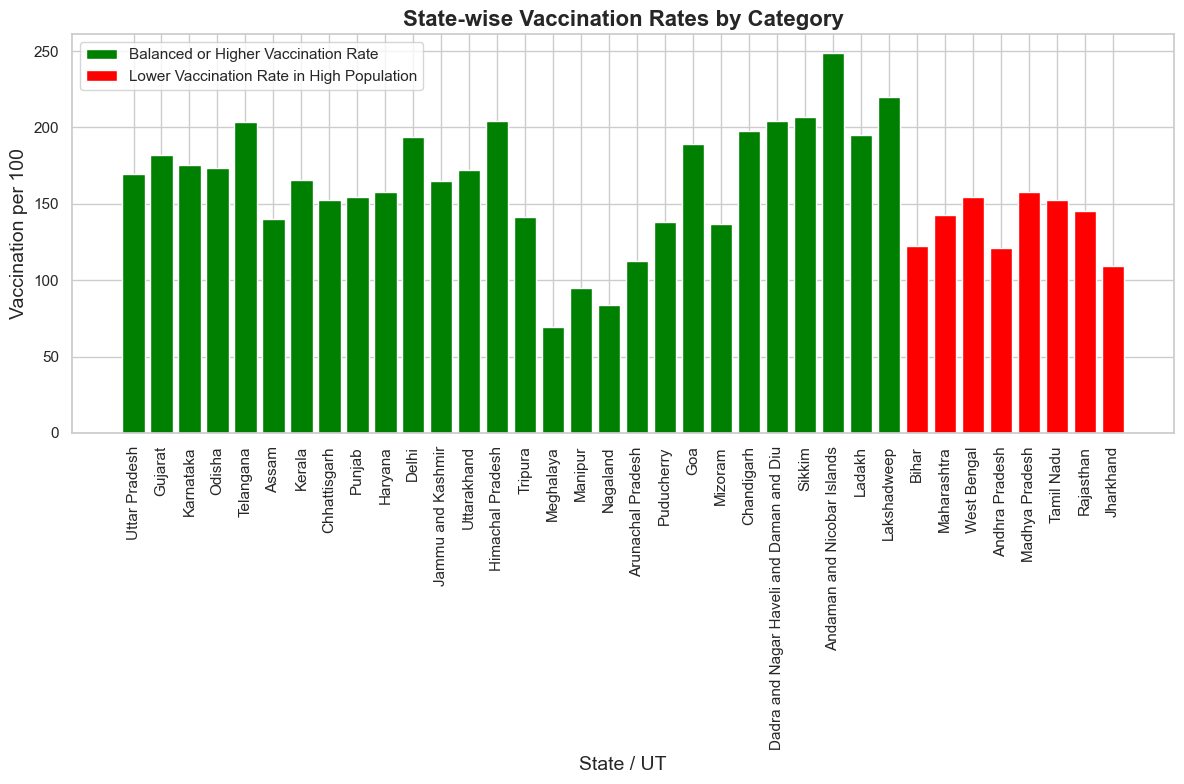

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Observation' category
df_balanced = df[df['Observation'] == 'Balanced or Higher Vaccination Rate']
df_low = df[df['Observation'] == 'Lower Vaccination Rate in High Population']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Bar for Balanced or Higher Vaccination Rate
plt.bar(
    df_balanced['State_UT'], 
    df_balanced['Vaccination_Per_100'], 
    color='green', 
    label='Balanced or Higher Vaccination Rate'
)
# Bar for Lower Vaccination Rate in High Population
plt.bar(
    df_low['State_UT'], 
    df_low['Vaccination_Per_100'], 
    color='red', 
    label='Lower Vaccination Rate in High Population'
)

plt.xlabel('State / UT', fontsize=14)
plt.ylabel('Vaccination per 100', fontsize=14)
plt.title('State-wise Vaccination Rates by Category', fontsize=16, weight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
# 15:Explore Relationship Between Population, Vaccination, and COVID‑19 Cases
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc('PopulationCasesVaccinationRelation')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT  Population  \
0                                      Delhi    19301096   
1                                     Ladakh      290492   
2                                        Goa     1521992   
3                                Maharashtra   124904071   
4                                 Tamil Nadu    83697770   
5                                 Puducherry     1646050   
6                Andaman and Nicobar Islands      399001   
7                                  Karnataka    69599762   
8                             Andhra Pradesh    91702478   
9                                  Telangana    38157311   
10  Dadra and Nagar Haveli and Daman and Diu      773997   
11                         Jammu and Kashmir    14999397   
12                                     Assam    35998752   
13                                   Tripura     4184959   
14                                   Haryana    28900667   
15                                  Naga

C:\Users\mpk25\AppData\Local\Temp\ipykernel_3572\2196747303.py:20: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


In [81]:
print(df.columns.tolist())

['State_UT', 'Population', 'Total_Vaccination_Doses', 'Total_Cases', 'Vaccination_Per_Person', 'Cases_Per_100_People']


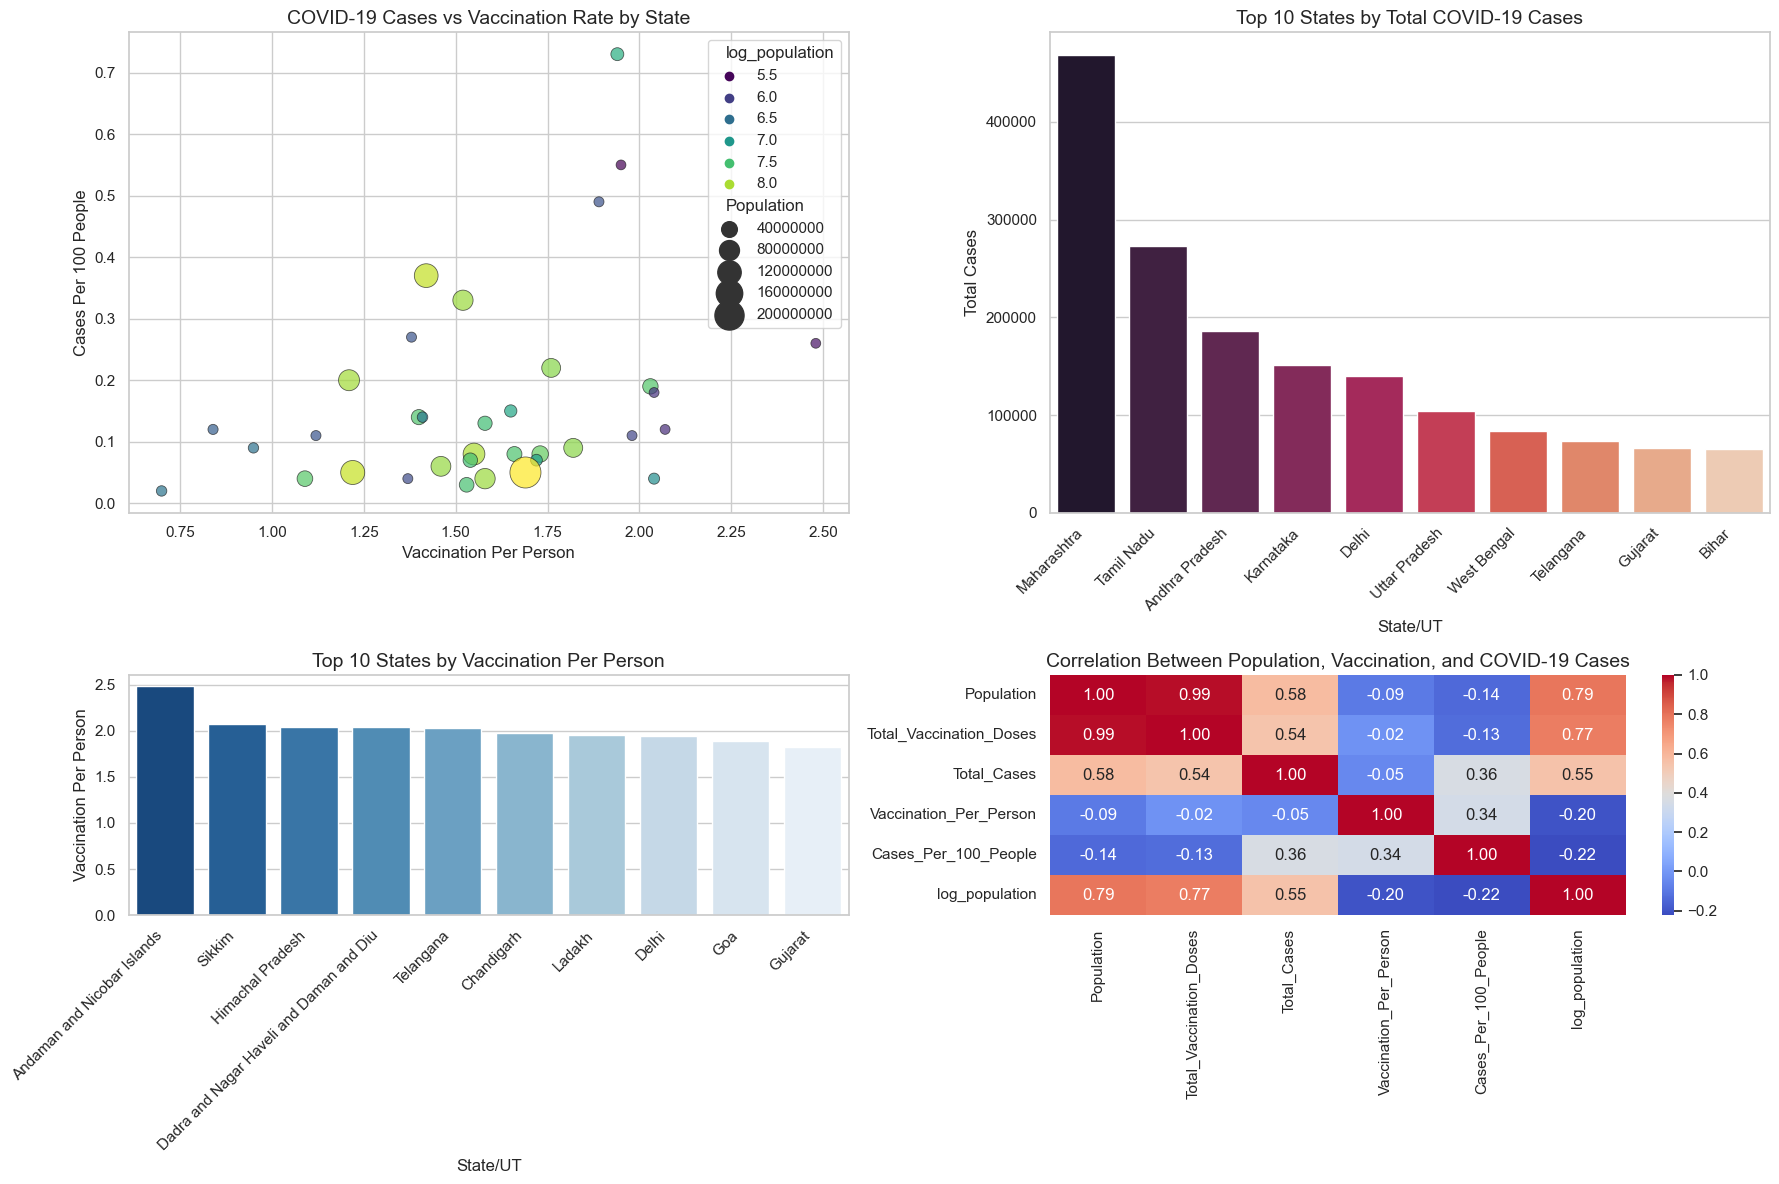

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top 10 datasets
top_cases = df.sort_values('Total_Cases', ascending=False).head(10)
top_vaccinated = df.sort_values('Vaccination_Per_Person', ascending=False).head(10)

# Create figure and GridSpec layout
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2, 2, height_ratios=[2,1])

# Scatter Plot: Vaccination vs Cases
ax0 = fig.add_subplot(gs[0, 0])
sns.scatterplot(
    data=df,
    x='Vaccination_Per_Person',
    y='Cases_Per_100_People',
    size='Population',
    hue='log_population',
    palette='viridis',
    sizes=(50, 500),
    alpha=0.7,
    edgecolor='k',
    ax=ax0
)
ax0.set_title('COVID-19 Cases vs Vaccination Rate by State', fontsize=14)
ax0.set_xlabel('Vaccination Per Person')
ax0.set_ylabel('Cases Per 100 People')

# Bar Plot: Top 10 States by Total Cases
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(
    data=top_cases,
    x='State_UT',
    y='Total_Cases',
    palette='rocket',
    ax=ax1
)
ax1.set_title('Top 10 States by Total COVID-19 Cases', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel('Total Cases')
ax1.set_xlabel('State/UT')

# Bar Plot: Top 10 States by Vaccination Per Person
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(
    data=top_vaccinated,
    x='State_UT',
    y='Vaccination_Per_Person',
    palette='Blues_r',
    ax=ax2
)
ax2.set_title('Top 10 States by Vaccination Per Person', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel('Vaccination Per Person')
ax2.set_xlabel('State/UT')

# Correlation Heatmap
ax3 = fig.add_subplot(gs[1, 1])
sns.heatmap(
    df[['Population', 'Total_Vaccination_Doses', 'Total_Cases', 
        'Vaccination_Per_Person', 'Cases_Per_100_People', 'log_population']].corr(),
    annot=True, fmt=".2f", cmap='coolwarm', ax=ax3
)
ax3.set_title('Correlation Between Population, Vaccination, and COVID-19 Cases', fontsize=14)

plt.tight_layout()
plt.show()




In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()

#Call stored procedure
cursor.callproc(' covid_full_summary')

#Process result sets
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    print(df)

                                    State_UT   region  Population  Avg_Cases  \
0                                Maharashtra     West   124904071  103348.62   
1                                 Tamil Nadu    South    83697770   52664.99   
2                                      Delhi    North    19301096   37442.36   
3                                    Gujarat     West    70400153   20078.75   
4                             Andhra Pradesh    South    91702478   19042.04   
5                                  Karnataka    South    69599762   18597.97   
6                              Uttar Pradesh    North   231502578   16200.37   
7                                West Bengal     East   100896618   12517.42   
8                                  Telangana    South    38157311   11689.77   
9                                  Rajasthan     West    79502477   10672.68   
10                            Madhya Pradesh  Central    85002417    9566.56   
11                                     B

C:\Users\mpk25\AppData\Local\Temp\ipykernel_6688\253800397.py:19: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


C:\Users\mpk25\AppData\Local\Temp\ipykernel_6688\2544624594.py:15: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():


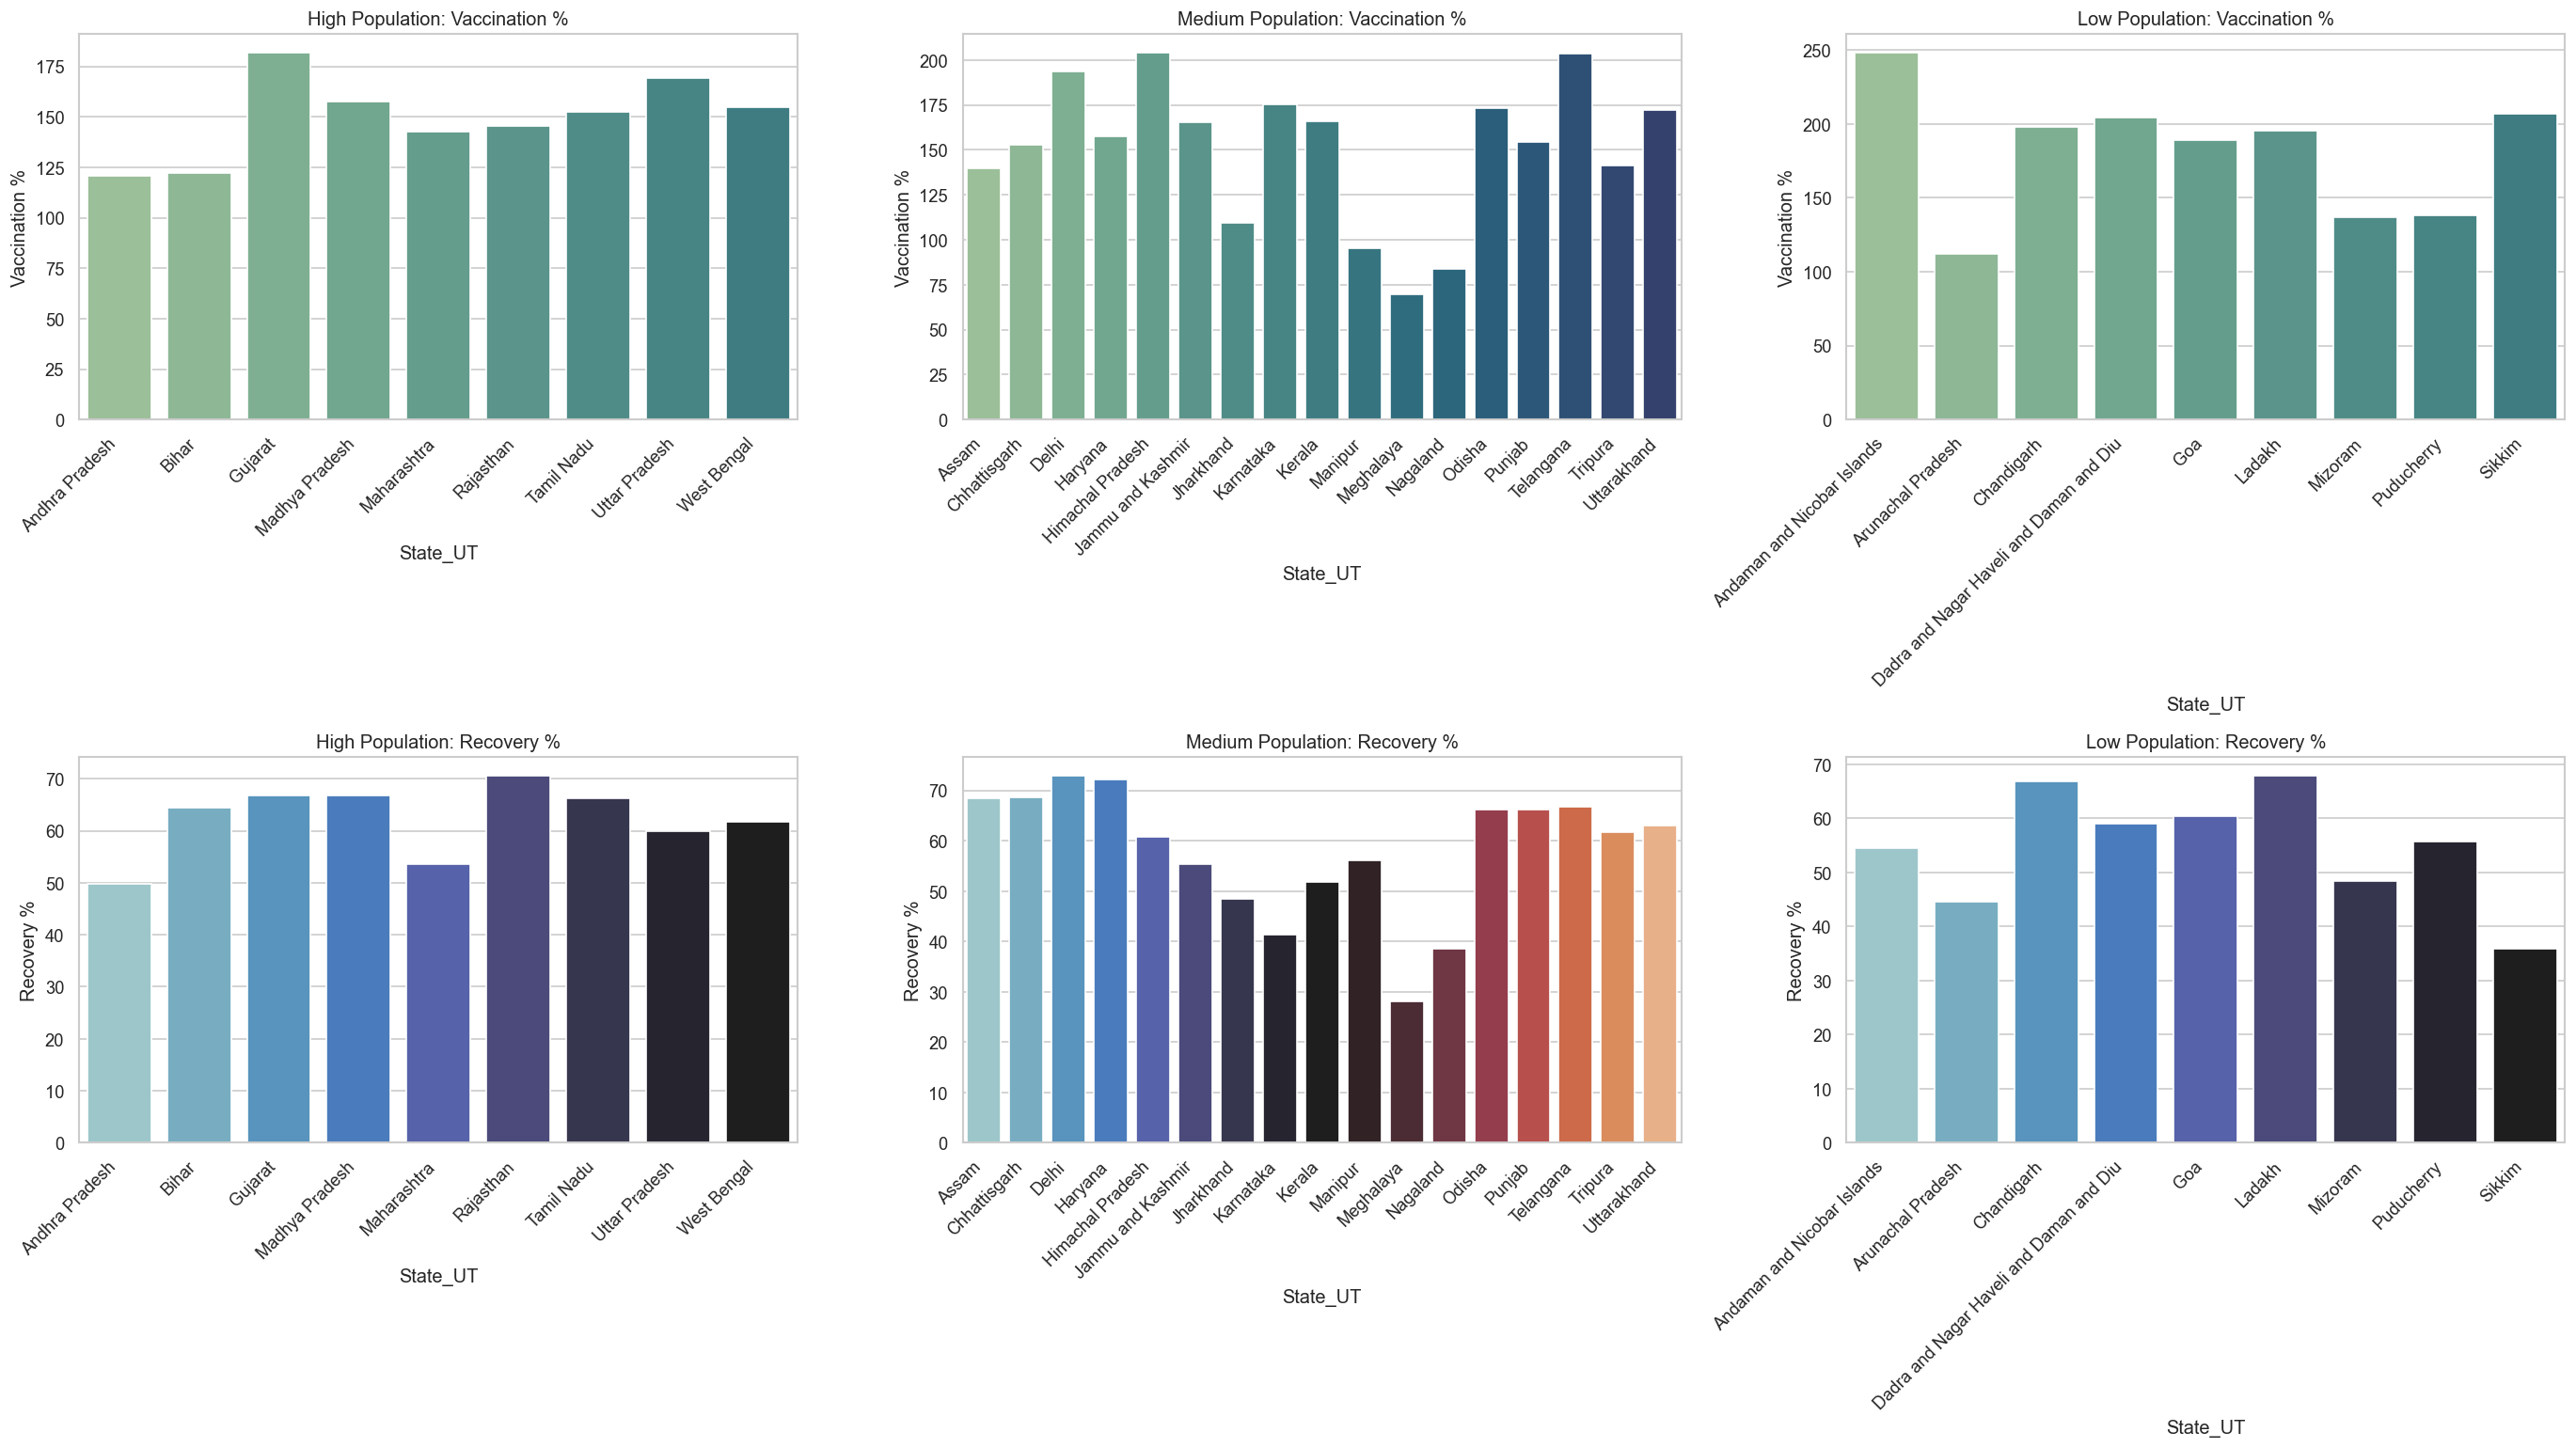

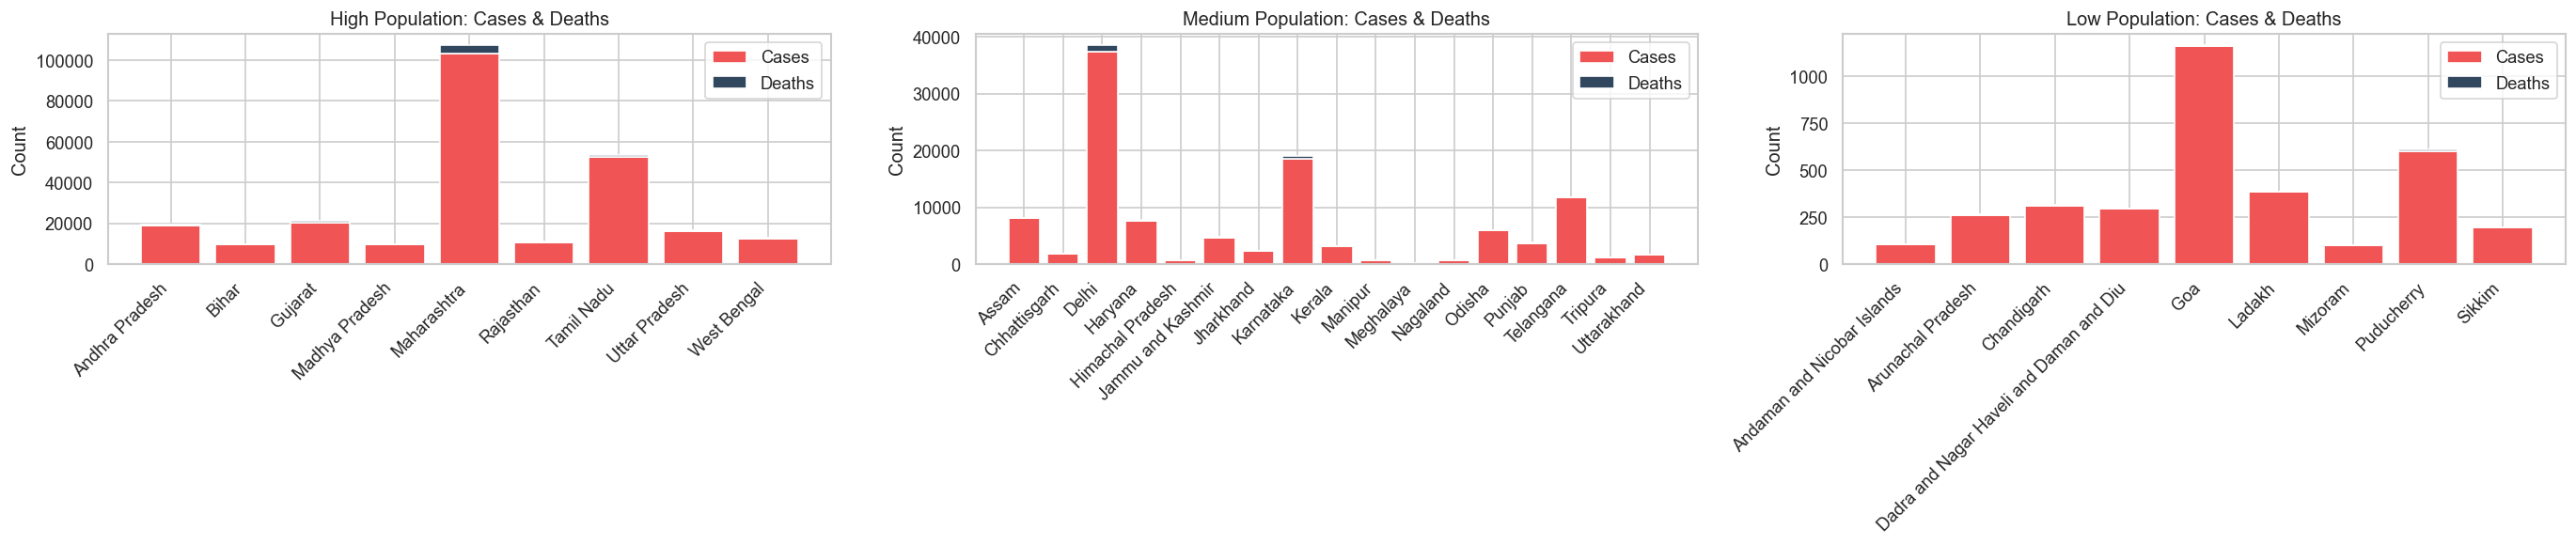

In [51]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect and fetch data from MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()
cursor.callproc('covid_full_summary_percent')
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
cursor.close()
conn.close()

# Assign population categories
high_thresh = df['Population'].quantile(0.75)
low_thresh = df['Population'].quantile(0.25)
def pop_category(pop):
    if pop >= high_thresh:
        return 'High'
    elif pop <= low_thresh:
        return 'Low'
    else:
        return 'Medium'
df['Population_Category'] = df['Population'].apply(pop_category)
df_high = df[df['Population_Category'] == 'High'].sort_values('State_UT')
df_medium = df[df['Population_Category'] == 'Medium'].sort_values('State_UT')
df_low = df[df['Population_Category'] == 'Low'].sort_values('State_UT')

# Set professional color palettes
vacc_palette = sns.color_palette("crest", n_colors=max(len(df_high), len(df_medium), len(df_low)))
recov_palette = sns.color_palette("icefire", n_colors=max(len(df_high), len(df_medium), len(df_low)))
cases_color = "#F05454"
deaths_color = "#30475E"

sns.set(style="whitegrid", context="notebook")

# --- Vaccination & Recovery Percent Bar Charts ---
fig1, axes = plt.subplots(2, 3, figsize=(23, 13))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Vaccination %
sns.barplot(x='State_UT', y='Vaccination_Percent', data=df_high, ax=axes[0,0], palette=vacc_palette)
axes[0,0].set_title('High Population: Vaccination %')
axes[0,0].set_ylabel('Vaccination %')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='State_UT', y='Vaccination_Percent', data=df_medium, ax=axes[0,1], palette=vacc_palette)
axes[0,1].set_title('Medium Population: Vaccination %')
axes[0,1].set_ylabel('Vaccination %')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='State_UT', y='Vaccination_Percent', data=df_low, ax=axes[0,2], palette=vacc_palette)
axes[0,2].set_title('Low Population: Vaccination %')
axes[0,2].set_ylabel('Vaccination %')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=45, ha='right')

# Recovery %
sns.barplot(x='State_UT', y='Recovery_Percent', data=df_high, ax=axes[1,0], palette=recov_palette)
axes[1,0].set_title('High Population: Recovery %')
axes[1,0].set_ylabel('Recovery %')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='State_UT', y='Recovery_Percent', data=df_medium, ax=axes[1,1], palette=recov_palette)
axes[1,1].set_title('Medium Population: Recovery %')
axes[1,1].set_ylabel('Recovery %')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='State_UT', y='Recovery_Percent', data=df_low, ax=axes[1,2], palette=recov_palette)
axes[1,2].set_title('Low Population: Recovery %')
axes[1,2].set_ylabel('Recovery %')
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# --- Cases & Deaths Stacked Bar Charts ---
fig2, axes2 = plt.subplots(1, 3, figsize=(23, 5))

# High population: stacked bars
x_indexes_high = range(len(df_high))
axes2[0].bar(x_indexes_high, df_high['Avg_Cases'], color=cases_color, label='Cases')
axes2[0].bar(x_indexes_high, df_high['Avg_Deaths'], color=deaths_color, label='Deaths', bottom=df_high['Avg_Cases'])
axes2[0].set_xticks(x_indexes_high)
axes2[0].set_xticklabels(df_high['State_UT'], rotation=45, ha='right')
axes2[0].set_title('High Population: Cases & Deaths')
axes2[0].set_ylabel('Count')
axes2[0].legend()

x_indexes_medium = range(len(df_medium))
axes2[1].bar(x_indexes_medium, df_medium['Avg_Cases'], color=cases_color, label='Cases')
axes2[1].bar(x_indexes_medium, df_medium['Avg_Deaths'], color=deaths_color, label='Deaths', bottom=df_medium['Avg_Cases'])
axes2[1].set_xticks(x_indexes_medium)
axes2[1].set_xticklabels(df_medium['State_UT'], rotation=45, ha='right')
axes2[1].set_title('Medium Population: Cases & Deaths')
axes2[1].set_ylabel('Count')
axes2[1].legend()

x_indexes_low = range(len(df_low))
axes2[2].bar(x_indexes_low, df_low['Avg_Cases'], color=cases_color, label='Cases')
axes2[2].bar(x_indexes_low, df_low['Avg_Deaths'], color=deaths_color, label='Deaths', bottom=df_low['Avg_Cases'])
axes2[2].set_xticks(x_indexes_low)
axes2[2].set_xticklabels(df_low['State_UT'], rotation=45, ha='right')
axes2[2].set_title('Low Population: Cases & Deaths')
axes2[2].set_ylabel('Count')
axes2[2].legend()

plt.tight_layout()
plt.show()




C:\Users\mpk25\AppData\Local\Temp\ipykernel_6368\2815478586.py:15: DeprecationWarning:

Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.



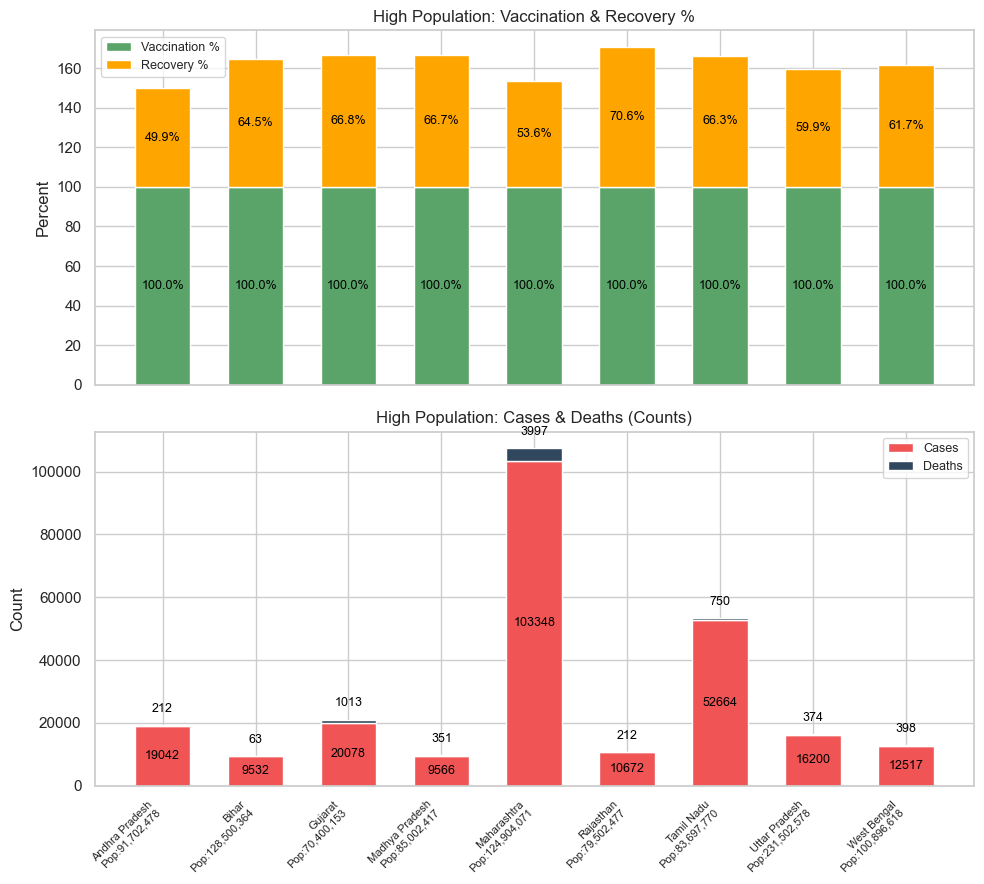

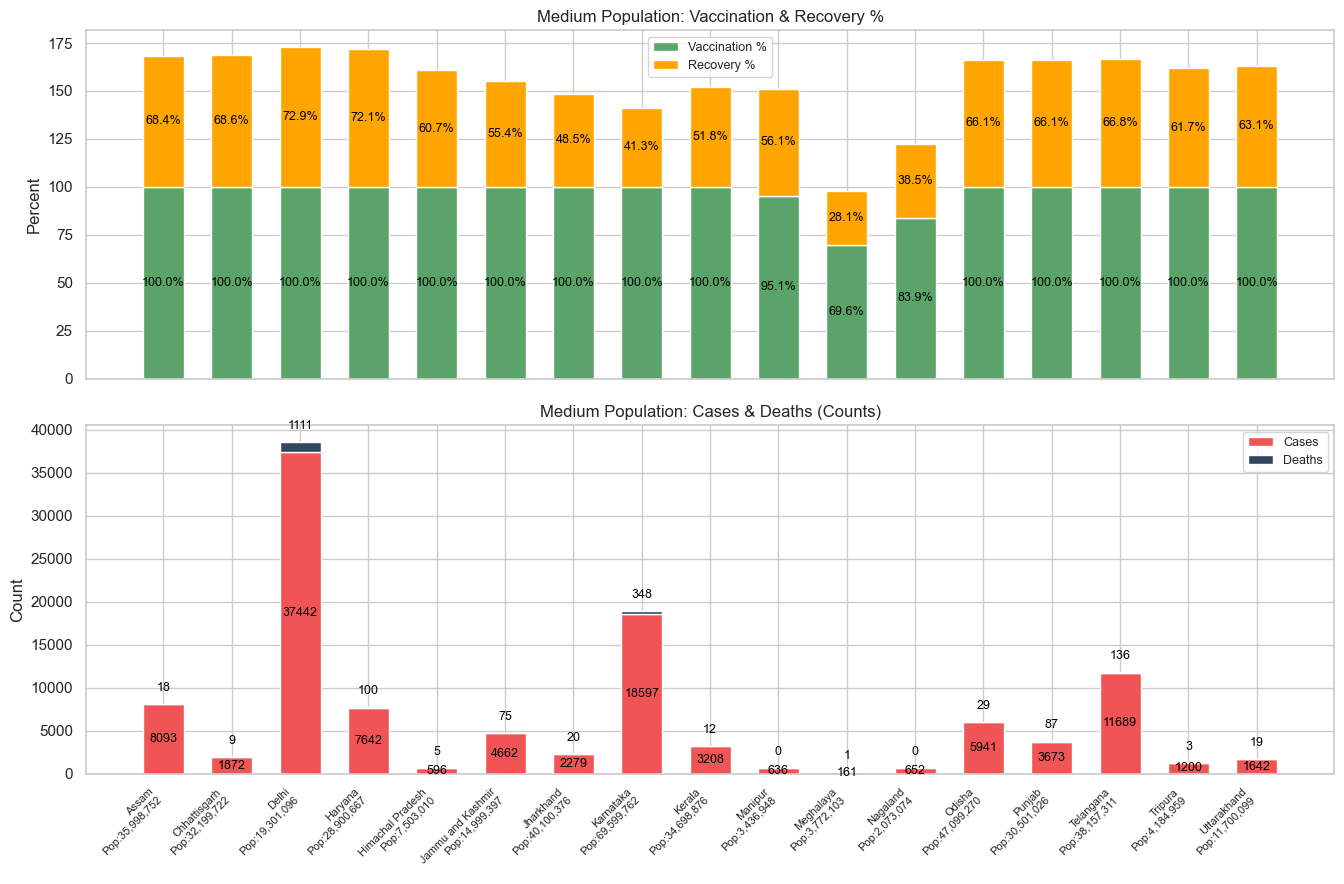

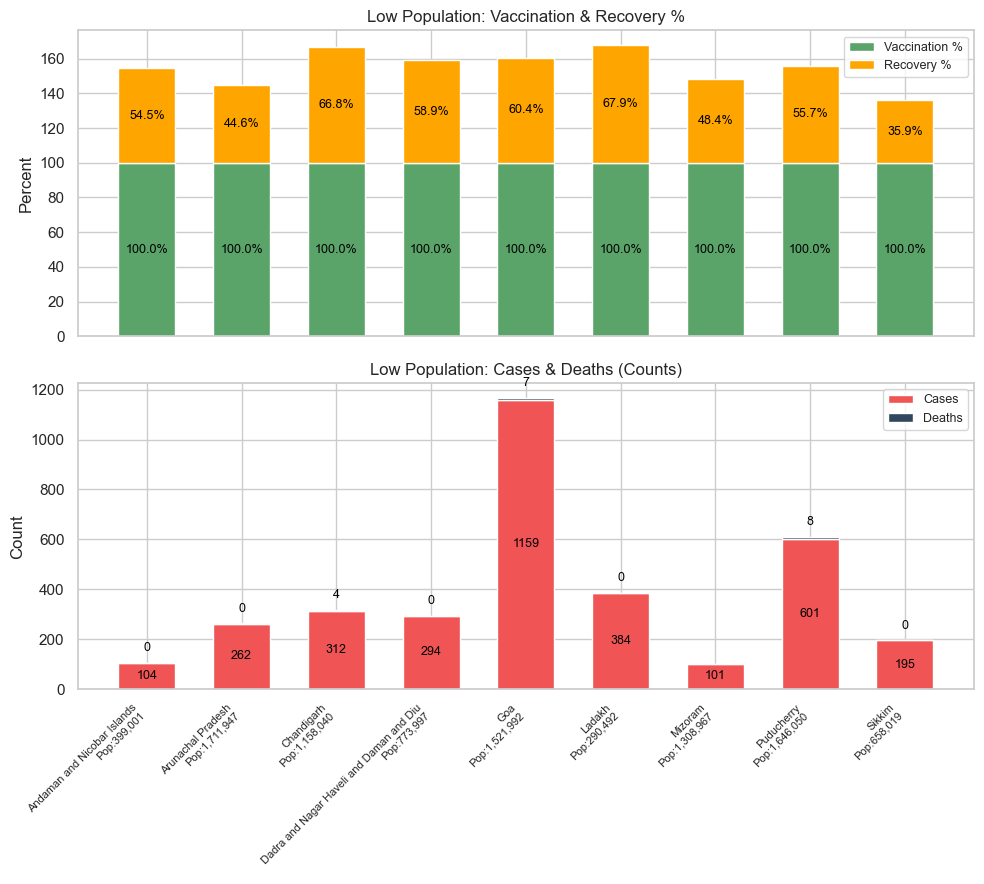

In [15]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data fetch and preparation ---
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pravasya",
    database="dummy"
)
cursor = conn.cursor()
cursor.callproc('covid_full_summary_percent')
for result in cursor.stored_results():
    df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
cursor.close()
conn.close()

# Convert numerics (important for annotation + calculation)
for col in ['Vaccination_Percent', 'Recovery_Percent', 'Avg_Cases', 'Avg_Deaths', 'Population']:
    df[col] = df[col].astype(float)

high_thresh = df['Population'].quantile(0.75)
low_thresh = df['Population'].quantile(0.25)

def pop_category(pop):
    if pop >= high_thresh:
        return 'High'
    elif pop <= low_thresh:
        return 'Low'
    else:
        return 'Medium'

df['Population_Category'] = df['Population'].apply(pop_category)
df['Vaccination_Percent'] = df['Vaccination_Percent'].clip(upper=100)
df['Recovery_Percent'] = df['Recovery_Percent']

df_high = df[df['Population_Category'] == 'High'].sort_values('State_UT')
df_medium = df[df['Population_Category'] == 'Medium'].sort_values('State_UT')
df_low = df[df['Population_Category'] == 'Low'].sort_values('State_UT')

sns.set(style="whitegrid", context="notebook")
vacc_color = "#5AA469"
recov_color = "#FFA500"
cases_color = "#F05454"
deaths_color = "#30475E"

groupings = [
    ('High', df_high),
    ('Medium', df_medium),
    ('Low', df_low),
]

for group, df_cat in groupings:
    x = range(len(df_cat))
    pop_labels = [f"{state}\nPop:{int(pop):,}" for state, pop in zip(df_cat['State_UT'], df_cat['Population'])]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(max(10, len(df_cat) * 0.8), 9), sharex=True)

    # --- Vaccination & Recovery (Percent) ---
    vacc_vals = df_cat['Vaccination_Percent'].values
    recov_vals = df_cat['Recovery_Percent'].values
    ax1.bar(x, vacc_vals, width=0.6, color=vacc_color, label='Vaccination %')
    ax1.bar(x, recov_vals, width=0.6, bottom=vacc_vals, color=recov_color, label='Recovery %')
    for i, (v, r) in enumerate(zip(vacc_vals, recov_vals)):
        ax1.text(i, v / 2, f"{v:.1f}%", ha='center', va='center', fontsize=9, color='black')
        ax1.text(i, v + r / 2, f"{r:.1f}%", ha='center', va='center', fontsize=9, color='black')
    ax1.set_ylabel('Percent')
    ax1.set_title(f"{group} Population: Vaccination & Recovery %")
    ax1.legend(fontsize=9)

    # --- Cases & Deaths (Counts) ---
    cases_vals = df_cat['Avg_Cases'].values
    deaths_vals = df_cat['Avg_Deaths'].values
    offset = max(cases_vals.max() + deaths_vals.max(), 1) * 0.03  # 3% of max bar for upward offset
    ax2.bar(x, cases_vals, width=0.6, color=cases_color, label='Cases')
    ax2.bar(x, deaths_vals, width=0.6, bottom=cases_vals, color=deaths_color, label='Deaths')
    for i, (c, d) in enumerate(zip(cases_vals, deaths_vals)):
        if c > 0:
            ax2.text(i, c / 2, f"{int(c)}", ha='center', va='center', fontsize=9, color='black')
        if d > 0:
            # deaths annotation moved upward by offset
            ax2.text(i, c + d + offset, f"{int(d)}", ha='center', va='bottom', fontsize=9, color='black')
    ax2.set_ylabel('Count')
    ax2.set_title(f"{group} Population: Cases & Deaths (Counts)")
    ax2.legend(fontsize=9)
    ax2.set_xticks(x)
    ax2.set_xticklabels(pop_labels, rotation=45, ha='right', fontsize=8)

    plt.tight_layout()
    plt.show()
